In [1]:
import numpy as np

In [2]:
n = 10
np.random.randint(1, n + 1, size=n)

array([ 9,  8, 10,  7,  9,  3,  6, 10,  7,  4])

In [3]:
from sklearn.ensemble import RandomForestClassifier

Умные люди рекомендуют задавать такие параметры:
n_estimators=10
criterion='gini'
max_depth=None
min_sample_split=2
min_sample_leaf=1
max_features='auto'
bootstrap=True
n_jobs=-1

че это и с чем его есть:
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [13]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

## Задача по титанику (датасет 1 на гитхабе)

In [43]:
df = pd.read_csv('D:/train.csv')

In [44]:
df.head()
y = df['Survived'].values
del df['Survived']
df['Age'].fillna(df['Age'].mean(), inplace=True)
feature_names = ['Sex', 'Age', 'SibSp', 'Pclass', 'Parch', 'Fare']
df = df[feature_names]
df['Sex'] = (df['Sex'] == 'male').astype(int)
X_train, X_test, y_train, y_test = train_test_split(df, y)

In [45]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print('ROC-AUC: ', roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1]))
print('accuracy: ', accuracy_score(y_test, tree.predict(X_test)))

ROC-AUC:  0.763707350195
accuracy:  0.784753363229


In [46]:
tree_params = {'max_depth': np.arange(1, 50),
              'criterion': ['gini', 'entropy']}
gs_tree = GridSearchCV(DecisionTreeClassifier(), tree_params, scoring='roc_auc')
gs_tree.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [47]:
gs_tree.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [19]:
print('ROC-AUC for optimated tree: ',
     roc_auc_score(y_test, gs_tree.best_estimator_.predict_proba(X_test)[:, 1]))

ROC-AUC for optimated tree:  0.834939148073


eto kakaia-to magia ia ne ponimaiu kak eto rabotaet

In [48]:
gs_tree.cv_results_.keys()
score = gs_tree.cv_results_['mean_test_score']
crit = np.array(gs_tree.cv_results_['param_criterion'])
depth = np.array(gs_tree.cv_results_['param_max_depth'])

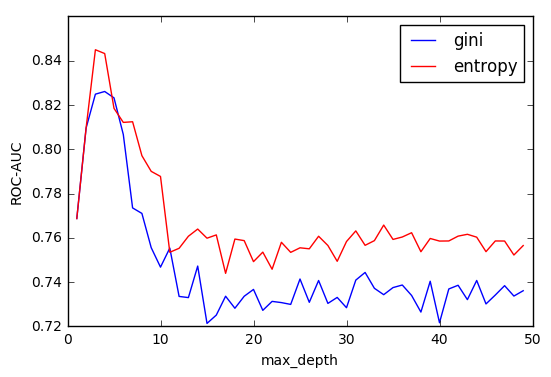

In [49]:
idx = crit == 'gini'
plt.plot(depth[idx], score[idx], c='b')
idx = crit == 'entropy'
plt.plot(depth[idx], score[idx], c='r')
plt.legend(['gini', 'entropy'])
plt.xlabel('max_depth')
plt.ylabel('ROC-AUC')

Random forest for titanic

In [50]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [51]:
print('ROC-AUC: ', roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1]))
print('accuracy: ', accuracy_score(y_test, tree.predict(X_test)))

ROC-AUC:  0.763707350195
accuracy:  0.784753363229


ничего не улучшилось, потому что параметры не настроены

In [52]:
rf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
rf.fit(X_train, y_train)
print('ROC-AUC: ', roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1]))
print('accuracy: ', accuracy_score(y_test, tree.predict(X_test)))

ROC-AUC:  0.763707350195
accuracy:  0.784753363229


In [35]:
rf.feature_importances_

array([ 0.27597752,  0.26989437,  0.05672408,  0.07237261,  0.03958174,
        0.28544968])

In [38]:
#del X_train['Parch']
#del X_test['Parch']
#del X_train['Sibsp']
#del X_test['Sibsp']

KeyError: 'Parch'

In [41]:
rf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
rf.fit(X_train, y_train)
print('ROC-AUC: ', roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1]))
print('accuracy: ', accuracy_score(y_test, tree.predict(X_test)))

ValueError: Number of features of the model must match the input. Model n_features is 6 and input n_features is 5 

In [53]:
rf.oob_score

False